In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cirq
import qsimcirq

from n12_m14_s0_eo.circuit_n12_m14_s0_e0_pEFGH import CIRCUIT, QUBIT_ORDER
from sycamore_exp import SycamoreExp

num_qubits = 12
num_cycles = 14
data_file_path = "n12_m14_s0_eo/amplitudes_n12_m14_s0_e0_pEFGH.txt"
interface = SycamoreExp(name="try", num_qubits=num_qubits, num_cycles=num_cycles)

simulated_statevector = interface.circuit_ideal_amps(CIRCUIT)
statevector_probs = np.abs(simulated_statevector)**2
raw_df, curated_df = interface.data_file_to_df(data_file_path)

print(f"The exact probabilites calculated from the statevector: {statevector_probs}")
print()

print("The raw Google's amplitudes-data and its calculated probabilities:")
curated_df

The exact probabilites calculated from the statevector: [8.92195946e-06 5.80668555e-04 8.51136338e-05 ... 1.23330348e-04
 3.70480474e-04 1.09062334e-04]

The raw Google's amplitudes-data and its calculated probabilities:


bitstring  real_amp  imag_amp     probs
7222   000000000000  0.001091  0.002781  0.000009
2867   000000000001  0.017359 -0.016713  0.000581
3582   000000000010 -0.008737  0.002962  0.000085
13784  000000000011  0.008198  0.012901  0.000234
1145   000000000100  0.010864  0.024643  0.000725
...             ...       ...       ...       ...
2366   111111111011 -0.008653 -0.020225  0.000484
3259   111111111100  0.007954 -0.000898  0.000064
6082   111111111101 -0.010784 -0.002652  0.000123
82     111111111110 -0.015668 -0.011180  0.000370
4066   111111111111  0.010091 -0.002689  0.000109

[4096 rows x 4 columns]

In [15]:
scaled_probs = curated_df["probs"] * interface.hilbert_dim
scaled_probs

7222     0.036546
2867     2.378409
3582     0.348632
13784    0.956976
1145     2.970854
           ...   
2366     1.982160
3259     0.262441
6082     0.505167
82       1.517484
4066     0.446714
Name: probs, Length: 4096, dtype: float64

In [72]:
np.e**-scaled_probs.sort_values()

10592    0.999834
1277     0.999446
6535     0.998729
6146     0.998513
11244    0.998253
           ...   
320      0.000637
1340     0.000452
1484     0.000409
633      0.000380
227      0.000022
Name: probs, Length: 4096, dtype: float64

In [80]:
x = np.linspace(0, max(scaled_probs))
x

array([ 0.        ,  0.21905392,  0.43810784,  0.65716176,  0.87621568,
        1.0952696 ,  1.31432352,  1.53337744,  1.75243136,  1.97148528,
        2.1905392 ,  2.40959312,  2.62864704,  2.84770096,  3.06675488,
        3.2858088 ,  3.50486272,  3.72391664,  3.94297056,  4.16202449,
        4.38107841,  4.60013233,  4.81918625,  5.03824017,  5.25729409,
        5.47634801,  5.69540193,  5.91445585,  6.13350977,  6.35256369,
        6.57161761,  6.79067153,  7.00972545,  7.22877937,  7.44783329,
        7.66688721,  7.88594113,  8.10499505,  8.32404897,  8.54310289,
        8.76215681,  8.98121073,  9.20026465,  9.41931857,  9.63837249,
        9.85742641, 10.07648033, 10.29553425, 10.51458817, 10.73364209])

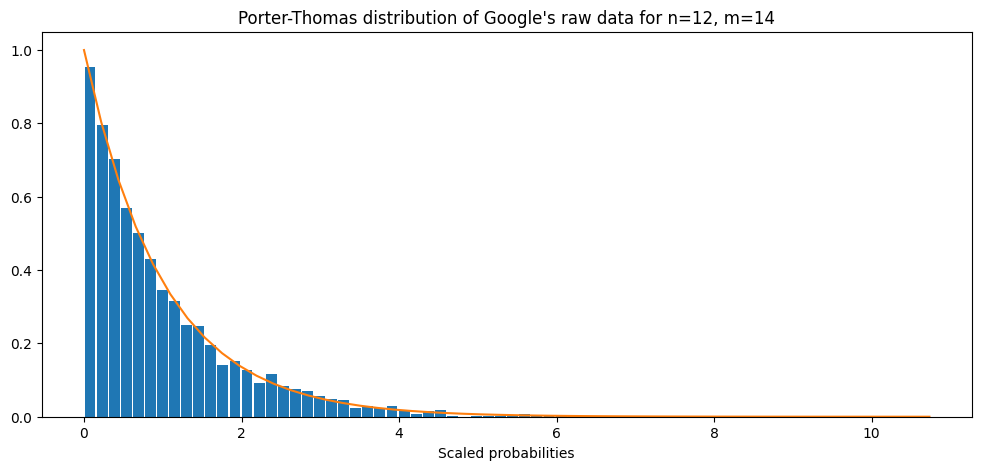

In [95]:
plt.figure(figsize=(12,5))

plt.hist(scaled_probs, bins=70, density=True, rwidth=0.9)
plt.plot(x, np.e**-x)

plt.title("Porter-Thomas distribution of Google's raw data for n=12, m=14")
plt.xlabel("Scaled probabilities")
plt.ylabel("")

plt.show()

In [28]:
len(scaled_probs)

4096